# Виконала студентка ІП-13 Лисенко Анастасія

# Лабораторна робота №6

1. Для даних по титаніку titanic.csv побудувати модель, в якій можна визначити, чи виживе пасажир, заповнивши решту параметрів.
2. Використати декілька методів.
3. Порівняти результати.


Встановлюємо потрібні бібліотеки

In [181]:
!pip install numpy pandas matplotlib seaborn scikit-learn -q

You should consider upgrading via the 'D:\DA\LAB_6\venv\Scripts\python.exe -m pip install --upgrade pip' command.


In [182]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.model_selection import train_test_split

Зчитуємо файл

In [183]:
path = 'data/titanic.csv'
dataset = pd.read_csv(path, sep=',', decimal='.')

Аналізуємо дані

In [184]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [185]:
dataset.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [186]:
dataset.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


Перетворюємо Pclass на категоріальну змінну

In [187]:
dataset['Pclass'] = dataset['Pclass'].astype(str)

In [188]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    object 
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


Видаляємо інформацію, яка нам не треба для аналізу(PassengerId, Name, Ticket) та видаляємо Cabin так як маємо багато пропущених значень

In [189]:
dataset = dataset.drop(columns=["PassengerId", "Name", "Cabin", "Ticket"])

За допомогою функції train_test_split ділимо основні дані на навчальну та тестову

In [190]:
train_selection, test_selection = train_test_split(dataset, test_size=0.2, random_state=1)

In [191]:
train_selection.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,1,3,male,NaN,2,0,23.2500,Q
309,1,1,female,30.0,0,0,56.9292,C
516,1,2,female,34.0,0,0,10.5000,S
120,0,2,male,21.0,2,0,73.5000,S
570,1,2,male,62.0,0,0,10.5000,S


Досліджуємо пропущені дані

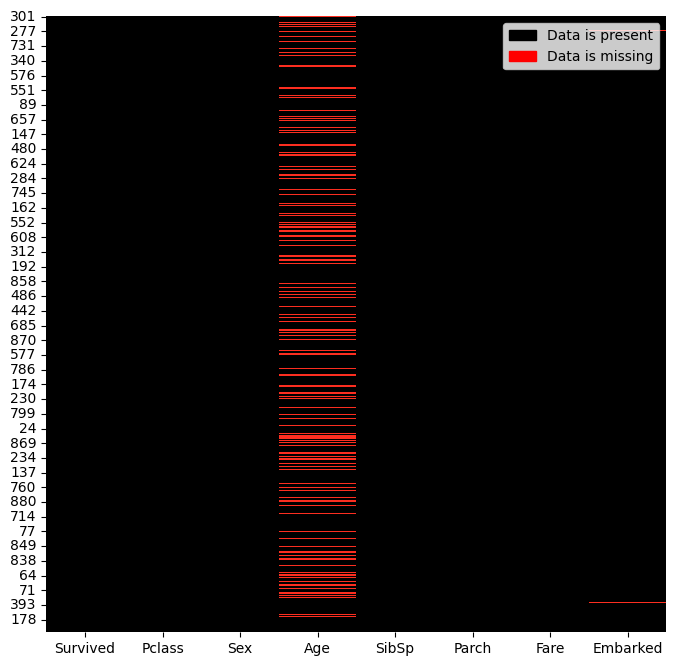

In [192]:
plt.figure(figsize=(8, 8))

black_patch = mpatches.Patch(color='black', label='Data is present')
red_patch = mpatches.Patch(color='red', label='Data is missing')

plt.legend(handles=[black_patch, red_patch], bbox_to_anchor=(1, 1), loc='best')

colours = ['#000000', '#FC2E20']
sns.heatmap(
    train_selection.isna(), cbar=False,
    cmap=sns.color_palette(colours),
)

plt.show()


Заповнюємо пропущені дані в Embarked та Age модами

In [193]:
train_selection['Embarked'] = train_selection['Embarked'].fillna(train_selection['Embarked'].mode()[0])
train_selection['Age'] = train_selection['Age'].fillna(train_selection['Age'].mode()[0])

test_selection['Embarked'] = test_selection['Embarked'].fillna(test_selection['Embarked'].mode()[0])
test_selection['Age'] = test_selection['Age'].fillna(test_selection['Age'].mode()[0])


Кодуємо категоріальні значення в навчальній і тестовій вибірках

In [194]:
all_features = pd.concat([train_selection, test_selection]).reset_index(drop=True)
all_features = pd.get_dummies(all_features)


In [195]:
train_selection = all_features.iloc[:train_selection.shape[0], :]
test_selection = all_features.iloc[train_selection.shape[0]:, :]


In [196]:
train_selection.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,24.0,2,0,23.2500,False,False,True,False,True,False,True,False
1,1,30.0,0,0,56.9292,True,False,False,True,False,True,False,False
2,1,34.0,0,0,10.5000,False,True,False,True,False,False,False,True
3,0,21.0,2,0,73.5000,False,True,False,False,True,False,False,True
4,1,62.0,0,0,10.5000,False,True,False,False,True,False,False,True


In [197]:
test_selection.head()

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
712,1,48.0,0,0,25.9292,True,False,False,True,False,False,False,True
713,0,18.0,0,0,7.8958,False,False,True,False,True,False,False,True
714,1,17.0,0,0,10.5000,False,True,False,True,False,False,False,True
715,0,18.0,0,0,8.1375,False,False,True,True,False,False,True,False
716,1,7.0,0,2,26.2500,False,True,False,True,False,False,False,True


Обрані мною моделі для навчання:
1. Decision Tree
2. Random Forest
3. Gradient Boosting

In [198]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import cross_val_score

In [199]:
X_train_selection = train_selection.drop(columns='Survived')
y_train_selection = train_selection['Survived']

X_test_selection = test_selection.drop(columns='Survived')
y_test_selection = test_selection['Survived']

In [200]:
X_train_selection

,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,24.0,2,0,23.2500,False,False,True,False,True,False,True,False
1,30.0,0,0,56.9292,True,False,False,True,False,True,False,False
2,34.0,0,0,10.5000,False,True,False,True,False,False,False,True
3,21.0,2,0,73.5000,False,True,False,False,True,False,False,True
4,62.0,0,0,10.5000,False,True,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...
707,19.0,0,0,7.6500,False,False,True,False,True,False,False,True
708,30.5,0,0,7.7500,False,False,True,True,False,False,True,False
709,21.0,0,0,73.5000,False,True,False,False,True,False,False,True
710,24.0,0,0,7.5500,False,False,True,True,False,False,False,True


## Decision Tree

In [201]:
decision_tree = DecisionTreeClassifier(max_depth=3, random_state=1)
tree_scores = cross_val_score(decision_tree, X_train_selection, y_train_selection, cv=5)
tree_scores

array([0.81818182, 0.82517483, 0.85211268, 0.86619718, 0.80985915])

In [202]:
tree_scores.mean()

0.83430513148823

In [203]:
decision_tree.fit(X_train_selection, y_train_selection)

DecisionTreeClassifier(max_depth=3, random_state=1)

In [204]:
decision_tree.score(X_test_selection, y_test_selection)

0.8044692737430168

## Random forest

In [205]:
random_forest = RandomForestClassifier(max_depth=5)
random_scores = cross_val_score(random_forest, X_train_selection, y_train_selection, cv=5)
random_scores

array([0.7972028 , 0.81818182, 0.86619718, 0.86619718, 0.81690141])

In [206]:
random_scores.mean()

0.8329360780065006

In [207]:
random_forest.fit(X_train_selection, y_train_selection)

RandomForestClassifier(max_depth=5)

In [208]:
random_forest.score(X_test_selection, y_test_selection)

0.770949720670391

## Gradient Boosting

In [209]:
gradient_boosting = GradientBoostingClassifier(learning_rate=0.05)
gradient_boosting_scores = cross_val_score(gradient_boosting, X_train_selection, y_train_selection, cv=5)
gradient_boosting_scores

array([0.8041958 , 0.7972028 , 0.85915493, 0.86619718, 0.84507042])

In [210]:
gradient_boosting_scores.mean()

0.8343642273219738

In [211]:
gradient_boosting.fit(X_train_selection, y_train_selection)

GradientBoostingClassifier(learning_rate=0.05)

In [212]:
gradient_boosting.score(X_test_selection, y_test_selection)


0.7821229050279329

Отже, за результатом дослідження найкраще себе показала модель Decision Tree Classifier(0.8044692737430168).
